# Introducción

Este documento tiene como objetivo el análisis exploratorio de los datos (EDA) usados en el reto SIIM-ISIC Melanoma Classification.

El dataset se compone de imagenes en 3 formatos distintos:

   * jpeg: Formato estandar para el intercambio de imágenes.
   * tfrecords: Formato que almacena los datos como una secuencia de cadenas binarias.
   * DICOM: Formato estándar de transmisión de imágenes médicas y datos entre hardware de propósito médico. 
    
y cada uno de ellos dividido en subconjuntos de train y test. 

Además, dos ficheros csv con los metadatos de cada imagen más un ejemplo del fichero que se ha de subir al reto de SIIM-ISIC para una correcta evaluación.


# Carga de paquetes y datos

In [1]:
import pandas as pd 

import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Variables
PATH = "../input/siim-isic-melanoma-classification"

**Carga de los conjuntos de datos**

Se procede a la carga de los conjuntos de train y test, además se visualizará una pequeña muestra de los mismos con el tamaño total

In [3]:
trainDf = pd.read_csv(os.path.join(PATH,"train.csv"))
testDf  = pd.read_csv(os.path.join(PATH,"test.csv"))

print("Muestra y tamaño del dataset entrenamiento:"+str(len(trainDf)))

display(trainDf.head())

Muestra y tamaño del dataset entrenamiento:33126


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
print("Muestra y tamaño del dataset test:"+str(len(testDf)))
display(testDf.head())

Muestra y tamaño del dataset test:10982


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


El motivo por el que hay 3 variables menos en el conjunto de test se debe a que estas 3 últimas indican si la lesión es maligna o no y esa es la variable objetivo.

# Análisis de datos

**Valores perdidos**

A continuación se exploran los conjuntos de datos para verificar si hay valores nulos y su distribución.

In [5]:
display(pd.DataFrame(trainDf.isnull().sum(), columns=["Número de nulos"]))

,Número de nulos
image_name,0
patient_id,0
sex,65
age_approx,68
anatom_site_general_challenge,527
diagnosis,0
benign_malignant,0
target,0


In [6]:
display(pd.DataFrame(testDf.isnull().sum(), columns=["Número de nulos"]))

,Número de nulos
image_name,0
patient_id,0
sex,0
age_approx,0
anatom_site_general_challenge,351


En ambos conjuntos, la mayoría de los nulos corresponden a la variable "anatom_site_general_challenge" aunque también hay algunos en las variables edad y sexo del conjunto de datos de train.

Para la correcta representación de las variables, se va a proceder a sustituir los valores 'nan' por valores 'unknown' o cero.

In [7]:
trainDf["sex"]                           = trainDf["sex"].replace(np.nan,"unknown")
trainDf["age_approx"]                    = trainDf["age_approx"].replace(np.nan,0)
trainDf["anatom_site_general_challenge"] = trainDf["anatom_site_general_challenge"].replace(np.nan,"unknown")

testDf["anatom_site_general_challenge"]  = testDf["anatom_site_general_challenge"].replace(np.nan,"unknown")

display(pd.DataFrame(trainDf.isnull().sum(), columns=["Número de nulos"]))


,Número de nulos
image_name,0
patient_id,0
sex,0
age_approx,0
anatom_site_general_challenge,0
diagnosis,0
benign_malignant,0
target,0


In [8]:
display(pd.DataFrame(testDf.isnull().sum(), columns=["Número de nulos"]))

,Número de nulos
image_name,0
patient_id,0
sex,0
age_approx,0
anatom_site_general_challenge,0


Como se observa ya no hay valores nulos

**Distribución de imagenes**

Dado que la variable objetivo sólo tiene dos opciones: benigno o maligno (0/1) se procede a realizar el estudio de la distribución de imágenes para cada posible valor.

Text(0.5, 0, 'Lesion')

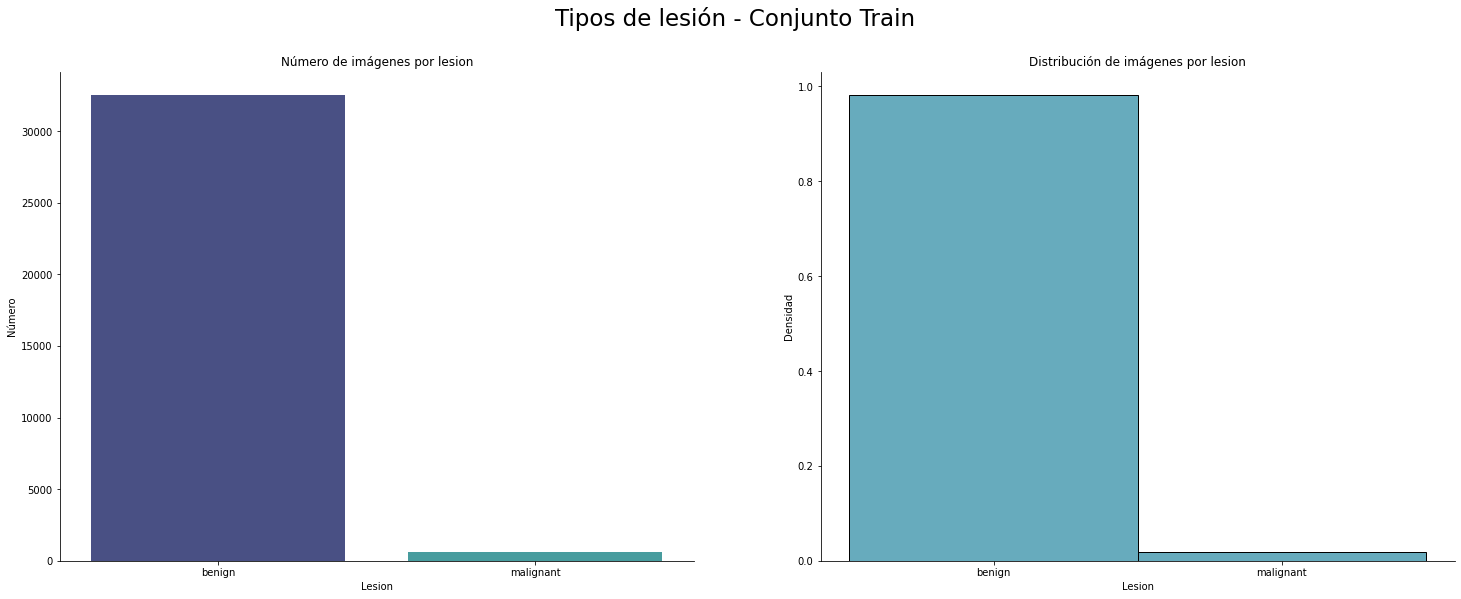

In [9]:
fig, ax = plt.subplots(1,2, figsize=(25, 9))
fig.suptitle("Tipos de lesión - Conjunto Train", fontsize=23)    
sns.countplot(x="benign_malignant", data=trainDf, palette="mako", ax=ax[0]).set_title("Número de imágenes por lesion")
ax[0].set_ylabel("Número")
ax[0].set_xlabel("Lesion")

sns.histplot(trainDf["benign_malignant"],kde=False, stat="density",color=sns.color_palette("mako")[3], ax=ax[1])
sns.despine()
ax[1].set_title("Distribución de imágenes por lesion")
ax[1].set_ylabel("Densidad")
ax[1].set_xlabel("Lesion")

Se observa que la distribución de imágenes es muy irregular, habrá que tener en cuenta este desbalanceo de clases a la hora de construir el modelo.

In [10]:
print("El número total de imágenes en el dataset de train es: "+str(len(trainDf)))
print("El de imagenes benignas: "+str(len(trainDf[trainDf.target == 0])))
print("El de imagenes malignas: "+str(len(trainDf[trainDf.target == 1])))
print("La proporción de images malignas sobre el total: "+str(len(trainDf[trainDf.target == 1])/len(trainDf)*100))      


El número total de imágenes en el dataset de train es: 33126
El de imagenes benignas: 32542
El de imagenes malignas: 584
La proporción de images malignas sobre el total: 1.762965646320111


Las imágenes malignas no llegan a representar más que el 1.8% de todo el dataset.

# **Distribución de pacientes**

**Imágenes**

Al igual que en el apartado anterior, se va a realizar un estudio de la distribución de los pacientes y de las imágenes asociadas a los mismos.

In [11]:
# Se obtiene el número de pacientes en train
numPacientesTrain   = trainDf.patient_id.nunique()
# Se obtiene la lista de pacientes en train
listaPacientesTrain = trainDf.patient_id.unique()

# Se obtiene el número de pacientes en test
numPacientesTest    = testDf.patient_id.nunique()

# Se obtiene la lista de pacientes en train
listaPacientesTest  = testDf.patient_id.unique()

# Se calcula la intersección de ambas listas y se verifica si hay 
# pacientes en común
interseccion = set(listaPacientesTrain) & set(listaPacientesTest)
print("Número de pacientes únicos en el conjunto de train: "+ str(numPacientesTrain))
print("Número de pacientes únicos en el conjunto de test:  "+ str(numPacientesTest))
print("Pacientes en común en ambos conjuntos: "+str(len(interseccion)))

Número de pacientes únicos en el conjunto de train: 2056
Número de pacientes únicos en el conjunto de test:  690
Pacientes en común en ambos conjuntos: 0


No existen pacientes comunes en ambos conjuntos de datos, sin embargo, al haber más imagenes que pacientes cabe esperar que un paciente pueda tener múltiples imágenes asociadas.

Se procede a revisar la distribución de imágenes por paciente.

In [12]:
# Se agrupa el dataframe por patien_id y target 
# y se cuentan las imágenes del conjunto de train
tmp                            = trainDf.groupby(["patient_id", "target"])["image_name"].count()

# Se crea un nuevo dataframe reseteando los indices
imagenesPacientesTrain         = pd.DataFrame(tmp).reset_index()

# Se establecen las nuevas columnas
imagenesPacientesTrain.columns = ["Id Paciente", "Target", "Num. Imagenes"]
imagenesPacientesTrain.head()

,Id Paciente,Target,Num. Imagenes
0,IP_0001230,0,6
1,IP_0019713,0,13
2,IP_0036322,0,5
3,IP_0038436,0,3
4,IP_0038545,0,27


In [13]:
# Se agrupa el dataframe por patien_id y target 
# y se cuentan las imágenes del conjunto de test
tmp                           = testDf.groupby(["patient_id"])["image_name"].count()

# Se crea un nuevo dataframe reseteando los indices
imagenesPacientesTest         = pd.DataFrame(tmp).reset_index() 

# Se establecen las nuevas columnas
imagenesPacientesTest.columns = ["Paciente", "Num. Imagenes"]
imagenesPacientesTest.head()

,Paciente,Num. Imagenes
0,IP_0013292,9
1,IP_0015264,6
2,IP_0018862,8
3,IP_0019804,11
4,IP_0035173,6


<Figure size 432x288 with 0 Axes>

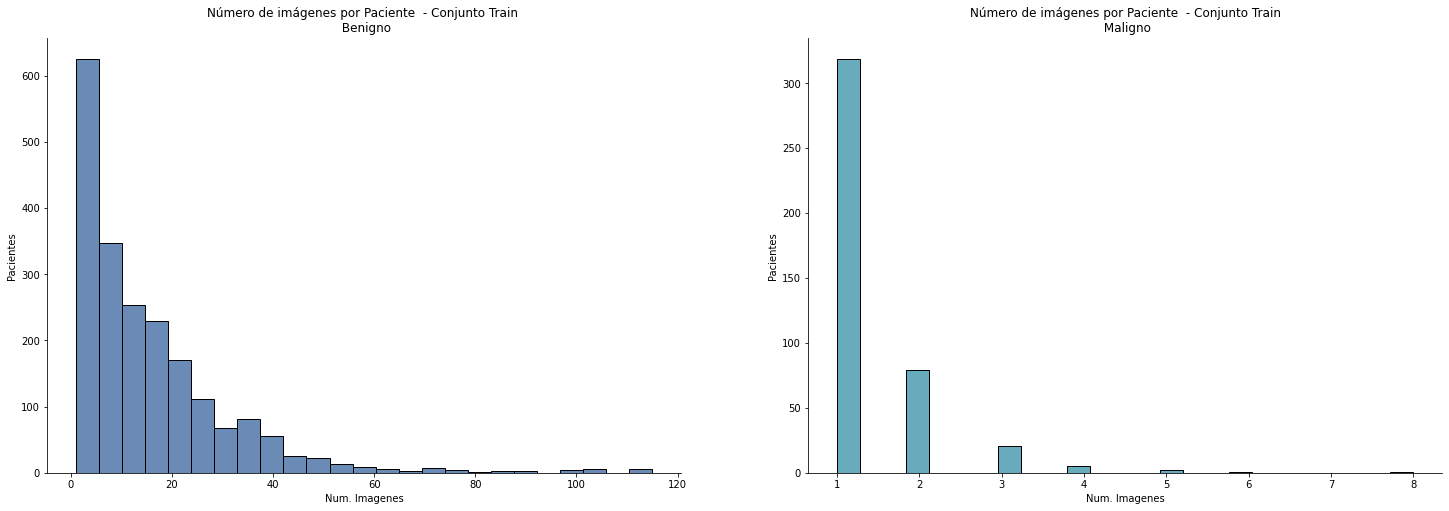

<Figure size 432x288 with 0 Axes>

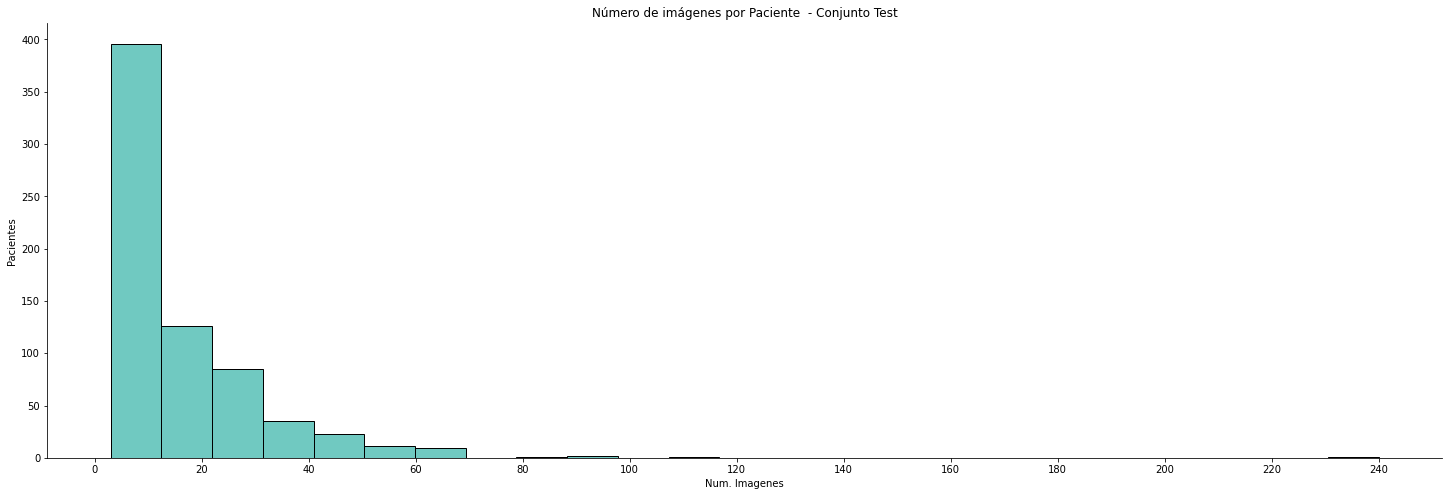

In [14]:
plt.figure()

fig, ax = plt.subplots(1,2,figsize=(25,8))

# Se crea un histograma para mostrar el número de
# imágenes por paciente de lesiones Benignas en el conjunto de Train 
sns.histplot(imagenesPacientesTrain.loc[imagenesPacientesTrain.Target==0, "Num. Imagenes"],kde=False,bins=25, color=sns.color_palette("mako")[2], ax=ax[0])
ax[0].set_title("Número de imágenes por Paciente  - Conjunto Train \n Benigno")
ax[0].set_ylabel("Pacientes")

# Se crea un histograma para mostrar el número de
# imágenes por paciente de lesiones Malignas en el conjunto de Train
sns.histplot(imagenesPacientesTrain.loc[imagenesPacientesTrain.Target==1, "Num. Imagenes"],kde=False,bins=25, color=sns.color_palette("mako")[3], ax=ax[1])
sns.despine()
ax[1].set_title("Número de imágenes por Paciente  - Conjunto Train\n Maligno")
ax[1].set_ylabel("Pacientes")

plt.show()

plt.figure()

fig, ax = plt.subplots(1,1,figsize=(25,8))

# Se crea un histograma para mostrar el número de
# imágenes en el conjunto de Test
sns.histplot(imagenesPacientesTest["Num. Imagenes"],kde=False,bins=25, color=sns.color_palette("mako")[4], ax=ax)
sns.despine()
ax.set_xticks(range(0,260,20))
ax.set_title ("Número de imágenes por Paciente  - Conjunto Test")
ax.set_ylabel("Pacientes")

plt.show()

Se puede observar que número de imágenes por paciente para el diagnóstico de beningno es mucho mayor que para el diagnóstico maligno, siendo lo normal una distribución de entre 1 y 2 imágenes con un máximo de 8, mientras que en el caso de diagnóstico benigno lo normal es encontrase pacientes con un número de imagenes entre 1 y 10 con un máximo de 120.

En el conjunto de test, la mayoría de los pacientes tienen alrededor de 10 imagenes (ninguno tiene menos) habiendo casos extremos con más de 200 imágenes.

**Edad**

Se procede a estudiar la distribución de pacientes según su edad en los conjuntos de train y test y su relación con la variable objetivo.

<Figure size 432x288 with 0 Axes>

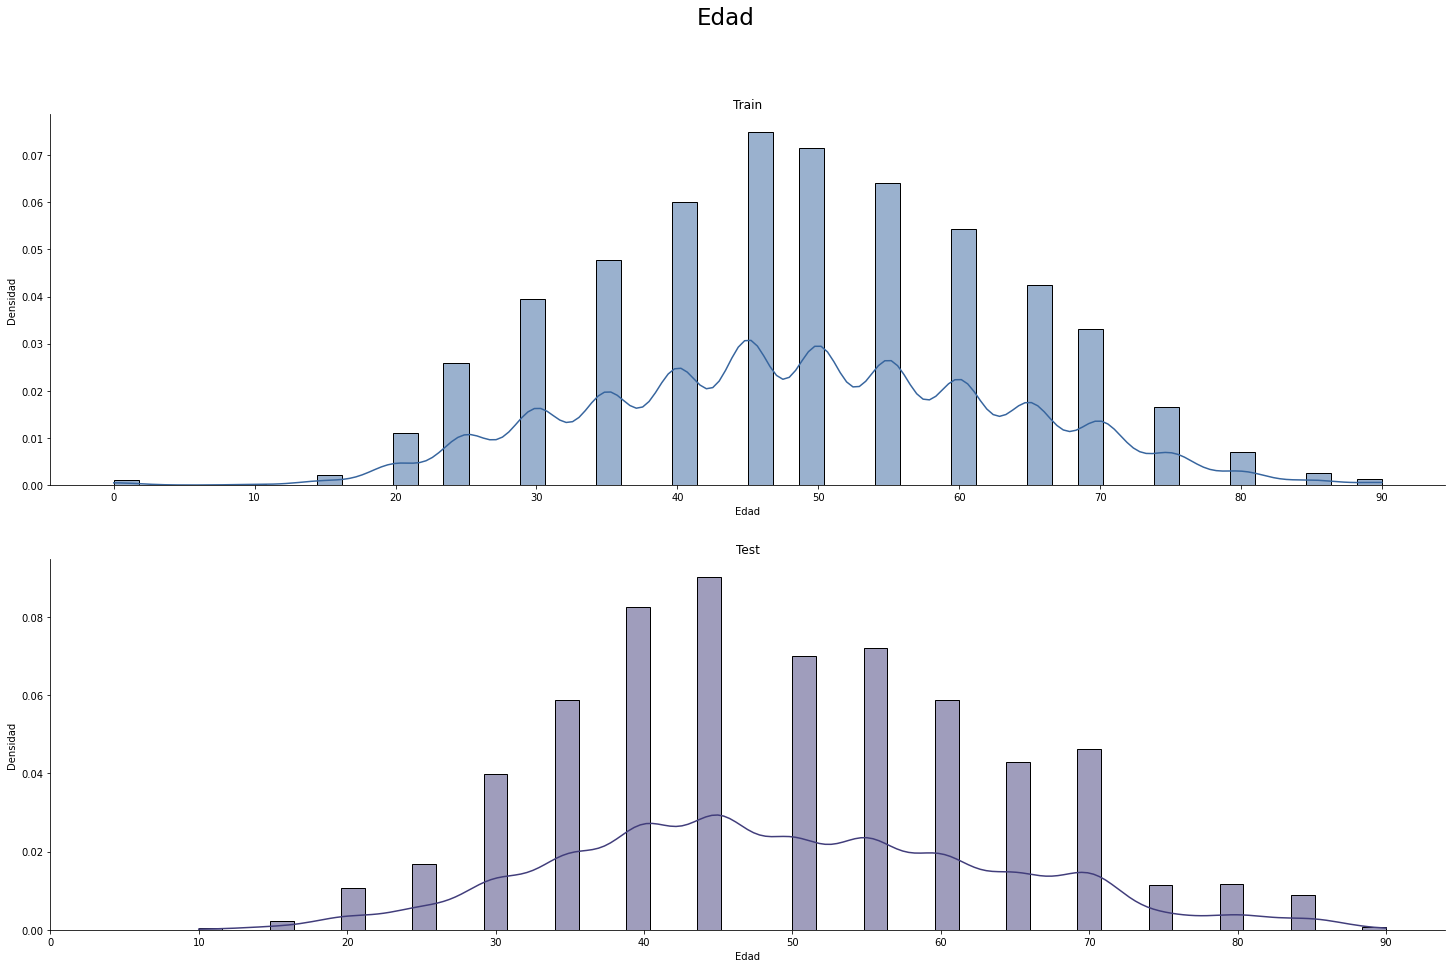

In [15]:
plt.figure()

fig, ax = plt.subplots(2, 1, figsize=(25, 15))
fig.suptitle("Edad", fontsize=23)

# Se crea un histograma de densidad para la variable edad en el conjunto de train
sns.histplot(trainDf["age_approx"],kde=True, color=sns.color_palette("mako")[2], bins=50,stat="density", ax=ax[0])
ax[0].set_xticks(range(0,100,10))
ax[0].set_title("Train")
ax[0].set_ylabel("Densidad")
ax[0].set_xlabel("Edad")

# Se crea un histograma de densidad para la variable edad en el conjunto de test
sns.histplot(testDf["age_approx"],kde=True, color=sns.color_palette("mako")[1], bins=50, stat="density",  ax=ax[1])
sns.despine()
ax[1].set_xticks(range(0,100,10))
ax[1].set_title("Test")
ax[1].set_ylabel("Densidad")
ax[1].set_xlabel("Edad")

plt.show()

Se observa que en ambos conjuntos la tendencia es que los casos se concentrente entre los 40 y 60 años aunque no sigan exactamente la misma distribución.

Se repite el estudio para la edad dependiendo del tipo de lesión.

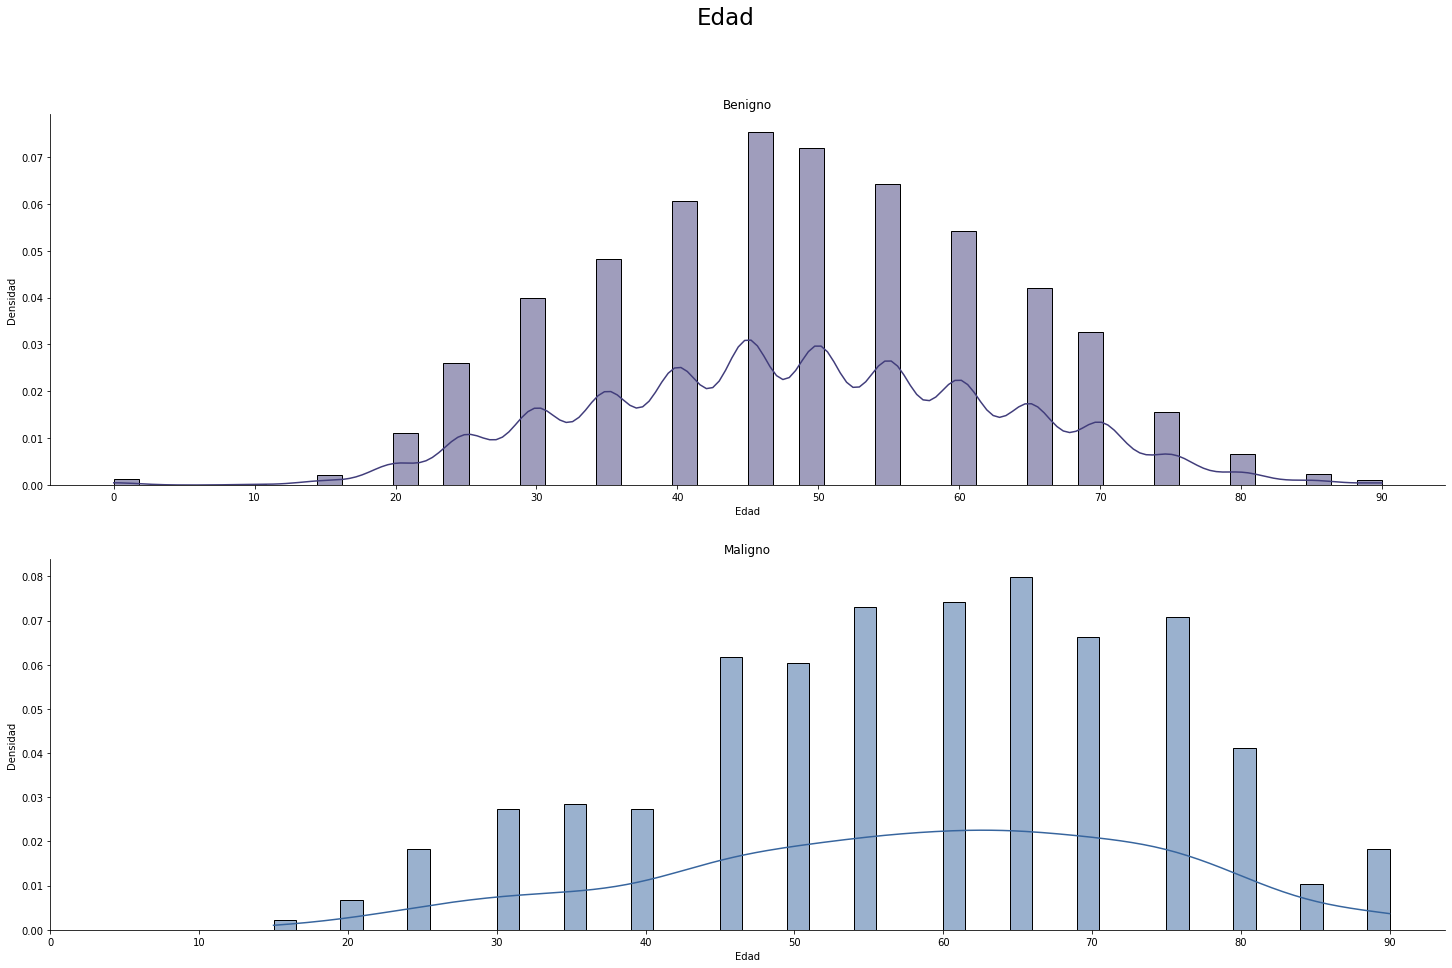

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(25, 15))

fig.suptitle("Edad", fontsize=23)

# Se crea un histograma de densidad para la variable edad 
# en el conjunto de train filtrado por lesión beninga
sns.histplot(trainDf[trainDf["target"] == 0]["age_approx"],kde=True, color=sns.color_palette("mako")[1], bins=50,stat="density", ax=ax[0])
ax[0].set_xticks(range(0,100,10))
ax[0].set_title("Benigno")
ax[0].set_ylabel("Densidad")
ax[0].set_xlabel("Edad")

# Se crea un histograma de densidad para la variable edad 
# en el conjunto de train filtrado por lesión maligna
sns.histplot(trainDf[trainDf["target"] == 1]["age_approx"],kde=True, color=sns.color_palette("mako")[2], bins=50,stat="density", ax=ax[1])
sns.despine()
ax[1].set_xticks(range(0,100,10))
ax[1].set_title("Maligno")
ax[1].set_ylabel("Densidad")
ax[1].set_xlabel("Edad")

plt.show()

Se observa que mientras las lesiones benignas tienen una distribución parecida al primer gráfico de edad, las lesiones malignas se concentran en pacientes de mayor edad a partir de los 45 años.

**Sexo**

Se procede a estudiar la distribución de pacientes según su sexo en los conjuntos de train y test y su relación con la variable objetivo.

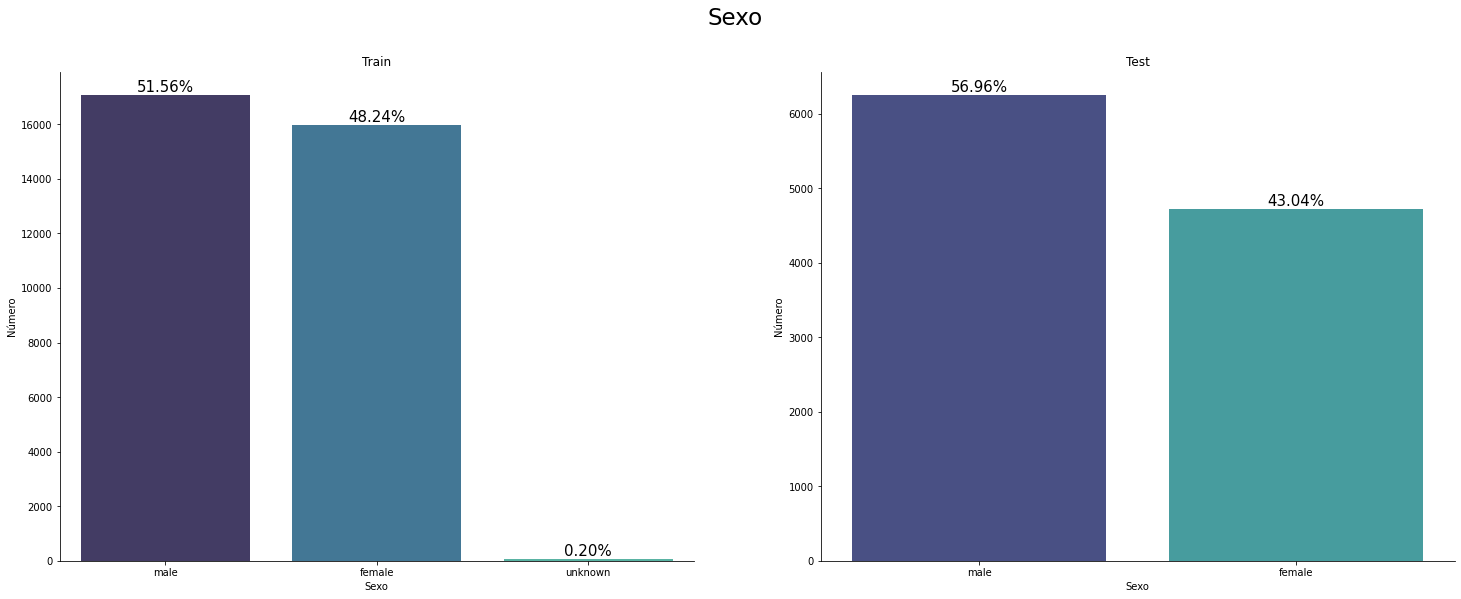

In [17]:
# Se obtienen los valores únicos
# para la variable sex
sexUniqueTrain = trainDf["sex"].unique()
sexUniqueTest  = testDf["sex"].unique()

# Se obtiene la longitud de cada dataframe
countTrainDf = len(trainDf)
countTestDf  = len(testDf)

fig, ax = plt.subplots(1, 2, figsize=(25, 9))
fig.suptitle("Sexo", fontsize=23)    

# Se dibuja el gráfico del conjunto de train
sns.countplot(x = "sex", data=trainDf, palette = "mako", order = sexUniqueTrain, ax = ax[0]).set_title("Train")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[0].annotate("{:.2f}%".format(100.*y/countTrainDf), (x.mean(), y), ha="center", va="bottom", size=15)
    
ax[0].set_ylabel("Número")
ax[0].set_xlabel("Sexo")

# Se dibuja el gráfico del conjunto de test
sns.countplot(x = "sex", data = testDf,  palette = "mako", order = sexUniqueTest, ax = ax[1]).set_title("Test")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate("{:.2f}%".format(100.*y/countTestDf), (x.mean(), y), ha = "center", va = "bottom", size = 15)
 
sns.despine()
ax[1].set_ylabel("Número")
ax[1].set_xlabel("Sexo")


plt.show()

Se observa que hay distribuciones similares de sexos en ambos conjuntos con una variación del 5%.

Se procede a estudiar la relación del sexo con la variable objetivo.

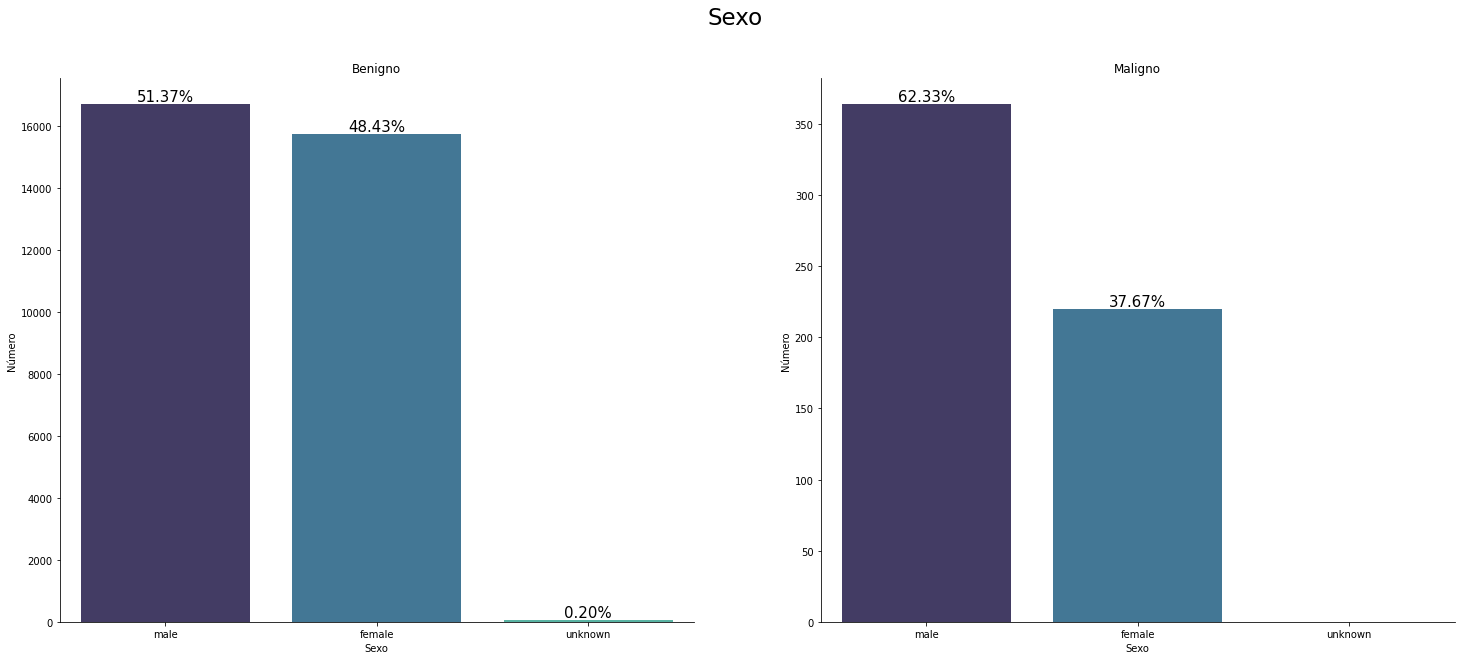

In [18]:
# Se obtiene la longitud del dataframe
# según la variable objetivo
countBenigno = len(trainDf[trainDf["target"] == 0])
countMaligno = len(trainDf[trainDf["target"] == 1])

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Sexo", fontsize=23) 

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Benigno
sns.countplot(x = "sex", data = trainDf[trainDf["target"] == 0], palette = "mako", order = sexUniqueTrain, ax = ax[0]).set_title("Benigno")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[0].annotate("{:.2f}%".format(100.*y/countBenigno), (x.mean(), y), ha ="center", va = "bottom", size = 15)

ax[0].set_xlabel("Sexo")
ax[0].set_ylabel("Número")

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Maligno
sns.countplot(x= "sex", data = trainDf[trainDf["target"] == 1], palette = "mako", order = sexUniqueTrain, ax = ax[1]).set_title("Maligno")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate("{:.2f}%".format(100.*y/countMaligno), (x.mean(), y), ha ="center", va ="bottom", size = 15)


ax[1].set_xlabel("Sexo")
ax[1].set_ylabel("Número")
sns.despine()

plt.show()

Según la distribución, hay casi un 11% más de hombres en la muestra que padecen tumores de tipo maligno.

**Lugar de la lesión**

Se procede a estudiar la distribución de pacientes según el lugar de la lesión en los conjuntos de train y test y su relación con la variable objetivo.

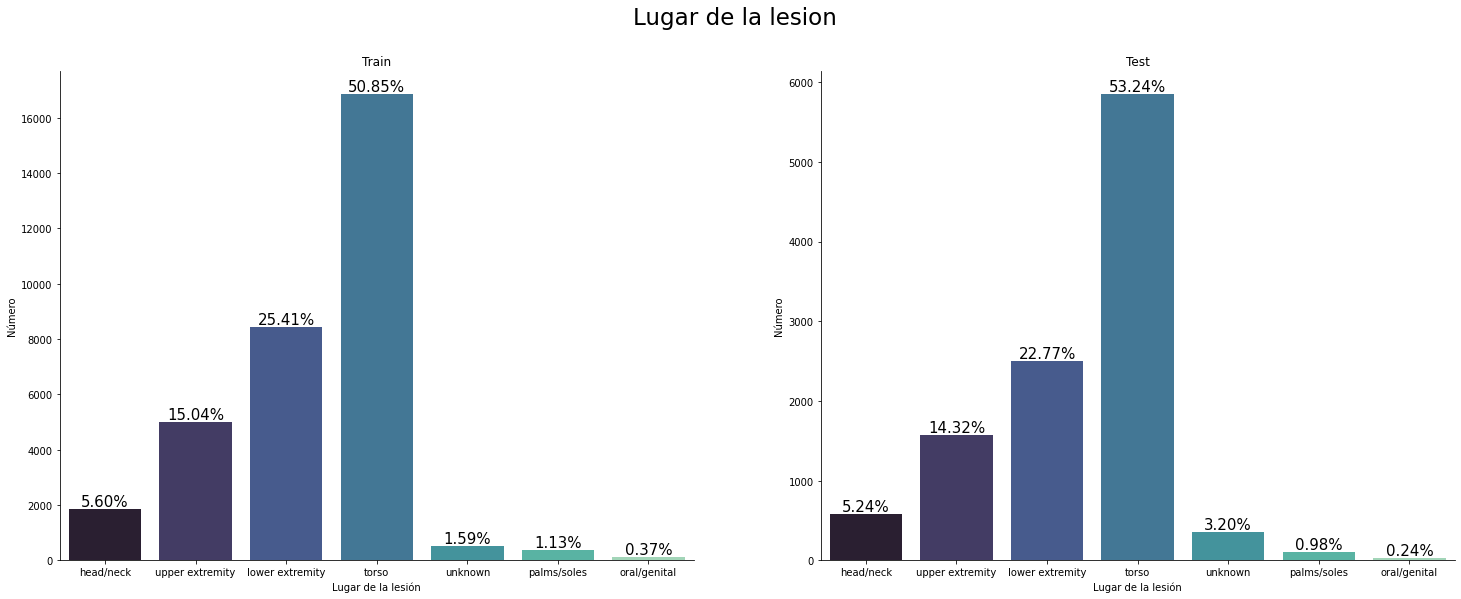

In [19]:
# Se obtienen los valores únicos
# para la variable 'anatom_site_general_challenge'
anatomUnique = trainDf["anatom_site_general_challenge"].unique()

fig, ax = plt.subplots(1, 2, figsize=(25, 9))
fig.suptitle("Lugar de la lesion", fontsize=23)    

# Se dibuja el gráfico del conjunto de train
sns.countplot(x = "anatom_site_general_challenge", data = trainDf, palette = "mako", order = anatomUnique, ax=ax[0]).set_title("Train")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[0].annotate("{:.2f}%".format(100.*y/countTrainDf), (x.mean(), y), ha = "center", va = "bottom", size = 15)

ax[0].set_ylabel("Número")
ax[0].set_xlabel("Lugar de la lesión")

# Se dibuja el gráfico del conjunto de test
sns.countplot(x = "anatom_site_general_challenge", data = testDf,  palette = "mako", order = anatomUnique, ax=ax[1]).set_title("Test")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate("{:.2f}%".format(100.*y/countTestDf), (x.mean(), y), ha = "center", va = "bottom", size = 15)

sns.despine()
ax[1].set_ylabel("Número")
ax[1].set_xlabel("Lugar de la lesión")

plt.show()

Ambos conjuntos tienen una distribución similar, la mayoría de lesiones se concentran en el torso, extremidades inferiores y superiores.

Se procede a estudiar la relación del lugar de la lesión con la variable objetivo.

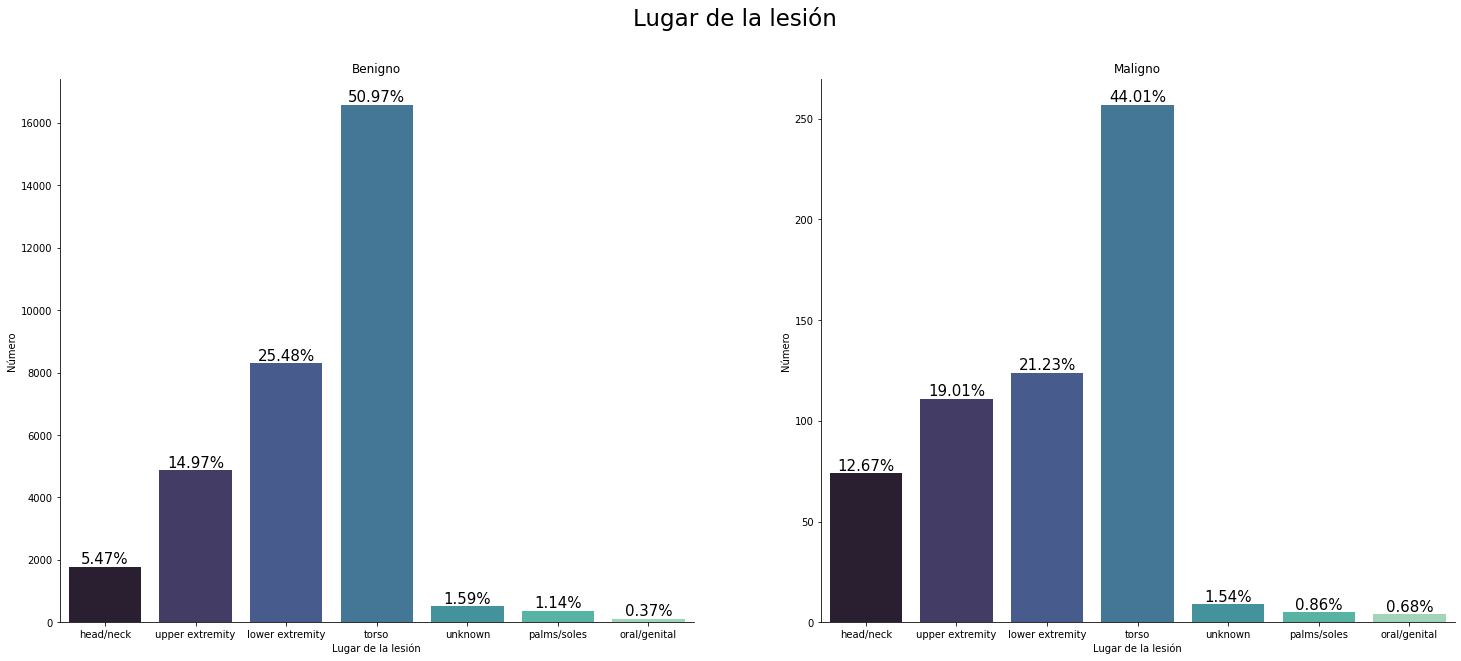

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))

fig.suptitle("Lugar de la lesión", fontsize=23)  

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Benigno
sns.countplot(x="anatom_site_general_challenge", data = trainDf[trainDf["target"] == 0], palette = "mako", order = anatomUnique, ax = ax[0]).set_title("Benigno")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[0].annotate("{:.2f}%".format(100.*y/countBenigno), (x.mean(), y), ha = "center", va = "bottom", size = 15)

ax[0].set_xlabel("Lugar de la lesión")
ax[0].set_ylabel("Número")

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Maligno
sns.countplot(x = "anatom_site_general_challenge", data = trainDf[trainDf["target"] == 1], palette = "mako", order = anatomUnique, ax = ax[1]).set_title("Maligno")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate("{:.2f}%".format(100.*y/countMaligno), (x.mean(), y), ha = "center", va = "bottom", size = 15)

ax[1].set_xlabel("Lugar de la lesión")
ax[1].set_ylabel("Número")
sns.despine()

plt.show()

La distribución difere en este caso, concentrandose algo más para las lesiones malignas en las partes del cuerpo más expuestas al sol, como son la cabeza y el cuello y las extremidades superiores.

**Diagnóstico**

Se procede a estudiar la distribución de pacientes según el diagnóstico en los conjuntos de train y test y su relación con la variable objetivo.

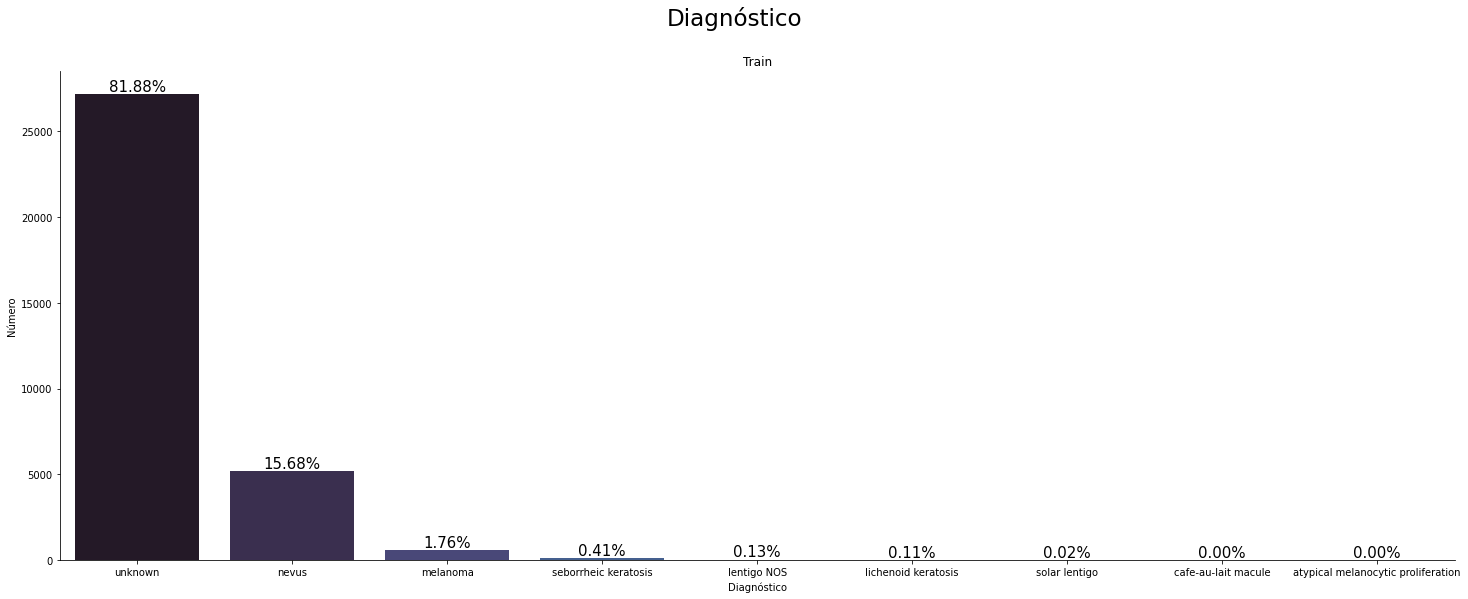

In [21]:
# Se obtienen los valores únicos
# para la variable diagnosis
diagnosisUnique = trainDf["diagnosis"].unique()

fig, ax = plt.subplots(1, 1, figsize=(25, 9))
fig.suptitle("Diagnóstico", fontsize=23)    

# Se dibuja el gráfico del conjunto de train
sns.countplot(x = "diagnosis", data = trainDf, palette = "mako", order = diagnosisUnique, ax = ax).set_title("Train")

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.2f}%".format(100.*y/countTrainDf), (x.mean(), y), ha = "center", va = "bottom", size = 15)

sns.despine()
ax.set_ylabel("Número")
ax.set_xlabel("Diagnóstico")

plt.show()

Se observa que la mayoría de las lesiones están clasificadas como "unknown" por lo que esta variable debería aportar poco para el estudio.

Se procede a estudiar la relación del diagnóstico con la variable objetivo.

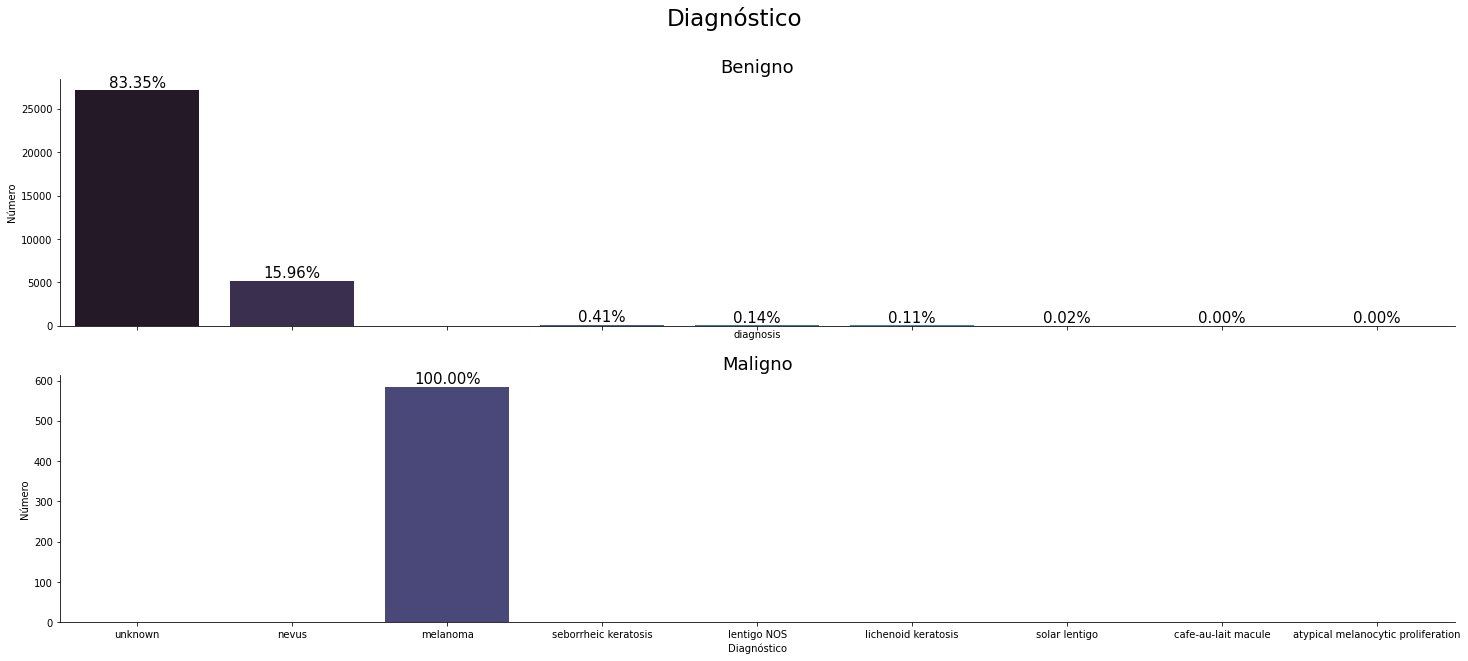

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(25, 10), sharex=True)

fig.suptitle("Diagnóstico", fontsize=23)    

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Benigno
sns.countplot(x = "diagnosis", data = trainDf[trainDf["target"] == 0], palette = "mako", order = diagnosisUnique, ax = ax[0]).set_title("Benigno", fontsize=18)

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[0].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[0].annotate("{:.2f}%".format(100.*y/countBenigno), (x.mean(), y), ha = "center", va = "bottom", size = 15)

ax[0].set_ylabel("Número")

# Se dibuja el gráfico del conjunto de train
# para la variable objetivo igual a Maligno
sns.countplot( x = "diagnosis", data = trainDf[trainDf["target"] == 1], palette = "mako", order = diagnosisUnique, ax = ax[1]).set_title("Maligno", fontsize=18)

# Se crean las anotaciones que indican
# el porcentaje de cada columna
for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate("{:.2f}%".format(100.*y/countMaligno), (x.mean(), y), ha = "center", va = "bottom", size = 15)

ax[1].set_xlabel("Diagnóstico")
ax[1].set_ylabel("Número")
sns.despine()

plt.show()

Como se comentó al principio del estudio, diagnóstico informa sobre el restulado de la variable objetivo, por eso para las lesiones malignas, todos los casos el diagnóstico es melanoma.